In [1]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow import keras
import matplotlib.pyplot as plt
#from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf

In [2]:
df = pd.read_csv("row_size25_vector_size8000.csv")

In [3]:
for col in df.columns: 
    print(col)

time_change
x_change
y_change
z_change
phi_change
theta_change
psi_change
accelerometer_reading_x_0
accelerometer_reading_x_1
accelerometer_reading_x_2
accelerometer_reading_x_3
accelerometer_reading_x_4
accelerometer_reading_x_5
accelerometer_reading_x_6
accelerometer_reading_x_7
accelerometer_reading_x_8
accelerometer_reading_x_9
accelerometer_reading_x_10
accelerometer_reading_x_11
accelerometer_reading_x_12
accelerometer_reading_x_13
accelerometer_reading_x_14
accelerometer_reading_x_15
accelerometer_reading_x_16
accelerometer_reading_x_17
accelerometer_reading_x_18
accelerometer_reading_x_19
accelerometer_reading_x_20
accelerometer_reading_x_21
accelerometer_reading_x_22
accelerometer_reading_x_23
accelerometer_reading_x_24
accelerometer_reading_y_0
accelerometer_reading_y_1
accelerometer_reading_y_2
accelerometer_reading_y_3
accelerometer_reading_y_4
accelerometer_reading_y_5
accelerometer_reading_y_6
accelerometer_reading_y_7
accelerometer_reading_y_8
accelerometer_reading_y_9
a

In [4]:
X = df.iloc[:,7:157]




#X = df[['accelerometer_reading_x_0','accelerometer_reading_y_0','accelerometer_reading_z_0','gyroscope_reading_phi_0','gyroscope_reading_theta_0','gyroscope_reading_psi_0']]
#t = df[['linear_position_x','linear_position_y','linear_position_z','angular_position_phi','angular_position_theta','angular_position_psi']]

#t = df[['phi_change','theta_change','psi_change']]
t = df[['phi_change']]

#t = df[['theta_change']]
#t = df[['psi_change']]

In [5]:
X


,accelerometer_reading_x_0,accelerometer_reading_x_1,accelerometer_reading_x_2,accelerometer_reading_x_3,accelerometer_reading_x_4,accelerometer_reading_x_5,accelerometer_reading_x_6,accelerometer_reading_x_7,accelerometer_reading_x_8,accelerometer_reading_x_9,...,gyroscope_reading_psi_15,gyroscope_reading_psi_16,gyroscope_reading_psi_17,gyroscope_reading_psi_18,gyroscope_reading_psi_19,gyroscope_reading_psi_20,gyroscope_reading_psi_21,gyroscope_reading_psi_22,gyroscope_reading_psi_23,gyroscope_reading_psi_24
0,-0.698110,0.590438,-0.257626,0.125631,-0.062696,0.595336,-0.444826,-0.540315,0.388053,0.062870,...,-8.800719e-03,5.298978e-03,9.884372e-03,-3.184273e-03,-2.997938e-03,1.894689e-02,9.907016e-04,1.828426e-03,1.944754e-03,-8.585624e-03
1,-0.099453,0.061359,-0.033114,0.028247,-0.017658,0.072462,-0.123457,0.070925,0.073482,-0.144182,...,-1.121775e-07,-5.435572e-09,1.052373e-07,-4.481473e-08,-1.186664e-07,2.082948e-07,-1.504837e-07,1.285739e-07,-1.430876e-07,5.696639e-08
2,-0.388588,0.290145,-0.155464,0.318173,-0.256355,0.028242,0.130538,-0.202318,0.211144,-0.068916,...,1.068992e-04,7.679180e-04,-5.237463e-03,5.592948e-03,7.299841e-03,2.906117e-03,-7.231721e-03,6.324463e-03,-4.747468e-03,1.577196e-03
3,-1.071640,0.640420,-0.366004,0.212364,0.598898,-0.598849,-0.511024,1.131753,-0.530478,-0.223965,...,2.090921e-02,-1.416385e-07,5.078921e-07,2.017139e-07,-6.800039e-07,8.511061e-07,-6.071061e-07,4.289079e-07,-6.729327e-07,1.772654e-07
4,-0.002145,0.001609,0.000911,-0.001406,0.001540,-0.008721,0.011719,-0.001178,-0.010470,0.010265,...,-1.160497e-05,9.331902e-06,-2.339698e-07,7.108546e-06,-1.142023e-05,4.342353e-06,1.276205e-06,-2.418973e-07,1.514210e-05,-1.567425e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.344549,-0.178680,-0.254628,0.254226,0.596655,-3.600011,3.001758,-0.625824,0.498295,0.390806,...,-2.722174e-08,1.567872e-07,4.718872e-07,-6.411936e-07,5.316456e-08,-2.072972e-07,6.010984e-07,3.187830e-07,-1.177266e-06,5.136813e-07
7996,-1.138212,0.000950,0.150669,-0.097780,-0.101460,-0.030136,1.282194,0.000000,-1.169728,-0.596613,...,5.501784e-04,5.484273e-04,5.466180e-04,1.634981e-02,-4.029324e-03,-1.339013e-02,-3.539107e-03,4.474886e-03,-2.388719e-02,-1.702367e-03
7997,0.356305,-0.119151,-0.078508,-0.045521,0.314906,-0.230252,-0.070506,-0.219769,0.501185,-0.201123,...,-7.178587e-07,5.506110e-07,-7.084310e-07,3.341495e-07,6.664534e-07,1.663469e-02,-4.313218e-07,6.903582e-07,-6.139961e-07,-2.495332e-07
7998,-0.007634,-0.005119,0.004320,0.004603,-0.004140,0.022927,0.006595,0.002951,-0.009726,0.005135,...,-1.241202e-10,-1.330370e-10,3.279835e-10,-8.055880e-12,-1.425668e-11,-1.963447e-10,-1.917192e-10,7.692665e-11,3.229322e-10,-1.307682e-10


In [6]:
t.shape

(8000, 1)

In [7]:
in_dim = X.shape[1]
out_dim = t.shape[1]

In [8]:
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.2)

In [9]:
t_train.shape

(6400, 1)

In [10]:
model = Sequential()
model.add(Dense(256, input_dim=in_dim, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(out_dim))
model.compile(loss="mse", optimizer="adam")

In [11]:
#optimizer = keras.optimizers.Adam()
#lr_metric = get_lr_metric(optimizer)

#model.compile(
#    optimizer=optimizer,
#    metrics=['accuracy', lr_metric],
#    loss='mean_absolute_error', 
#    )

In [12]:
#model.evaluate(X_train, t_train, batch_size=12, verbose=2)

In [14]:
model.fit(X_train, t_train, epochs=30, batch_size=12, verbose=2)

Epoch 1/30
534/534 - 2s - loss: 1.4583e-05
Epoch 2/30
534/534 - 2s - loss: 8.1232e-05
Epoch 3/30
534/534 - 2s - loss: 0.0027
Epoch 4/30
534/534 - 2s - loss: 0.2067
Epoch 5/30
534/534 - 2s - loss: 3.6093e-05
Epoch 6/30
534/534 - 2s - loss: 3.6696e-05
Epoch 7/30
534/534 - 3s - loss: 2.1467e-05
Epoch 8/30
534/534 - 2s - loss: 5.3293e-06
Epoch 9/30
534/534 - 2s - loss: 6.7475e-06
Epoch 10/30
534/534 - 2s - loss: 1.7830e-06
Epoch 11/30
534/534 - 2s - loss: 3.4741e-06
Epoch 12/30
534/534 - 2s - loss: 3.5550e-06
Epoch 13/30
534/534 - 2s - loss: 1.9857e-06
Epoch 14/30
534/534 - 2s - loss: 2.8894e-06
Epoch 15/30
534/534 - 2s - loss: 3.6052e-05
Epoch 16/30
534/534 - 1s - loss: 1.8470e-05
Epoch 17/30
534/534 - 2s - loss: 4.9554e-07
Epoch 18/30
534/534 - 3s - loss: 4.4158e-07
Epoch 19/30
534/534 - 2s - loss: 4.1180e-07
Epoch 20/30
534/534 - 2s - loss: 4.6513e-07
Epoch 21/30
534/534 - 2s - loss: 1.1871e-06
Epoch 22/30
534/534 - 2s - loss: 1.4762e-06
Epoch 23/30
534/534 - 1s - loss: 4.6626e-07
Epoch

In [15]:
ypred = model.predict(X_test)
print("y1 MSE: ", mean_squared_error(t_test.iloc[:, 0], ypred[:,0])) 
#print("y2 MSE: ", mean_squared_error(t_test.iloc[:, 1], ypred[:,1]))
#print("y3 MSE: ", mean_squared_error(t_test.iloc[:, 2], ypred[:,2]))


y1 MSE:  8.746210316051161e-05


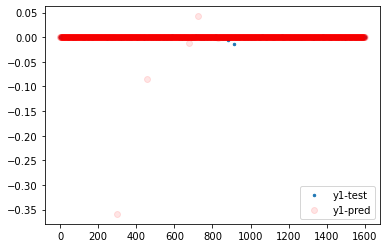

In [16]:
x_ax = range(len(X_test))

plt.scatter(x_ax, t_test.iloc[:, 0],  s=6, label="y1-test")
plt.scatter(x_ax, ypred[:,0], label="y1-pred",c="red",alpha = 0.1)

plt.legend()
plt.show()

In [17]:
ypred

array([[0.00082301],
       [0.00055873],
       [0.00052738],
       ...,
       [0.00082301],
       [0.0005234 ],
       [0.00082301]], dtype=float32)

In [18]:
t_test

,phi_change
6597,-4.984940e-06
1166,-1.918182e-04
4746,-5.342174e-09
1119,7.462212e-05
7026,6.218571e-04
...,...
986,2.383110e-06
3832,-1.198136e-04
172,-2.349961e-07
6115,1.279443e-09


In [ ]:
m = tf.keras.metrics.AUC(num_thresholds=3)
m.update_state(t_test,ypred)
m.result().numpy()